In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
input_path_questions="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\QuestionsPosts_2017_2020.csv"
input_path_answers="C:\\Users\\Farima\\OneDrive\\Data\\PhD\\StackOverFlow-data\\Posts\\FinalCsvFiles\\AnswersPosts_2017_2020.csv"

In [402]:
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

In [403]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [404]:
from scipy.stats import f_oneway

In [2]:
data_q=pd.read_csv(input_path_questions,names=["RowId","CreateDate","Score","ViewCount","LastEditDate","LastActivityDate",
                                               "AnswerCount","CommentCount","FavoritCount","AcceptedAnswerId"],dtype=str)
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId
0,41412454,2017-01-01T00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN
1,41412456,2017-01-01T00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707
2,41412462,2017-01-01T00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN
3,41412463,2017-01-01T00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502
4,41412468,2017-01-01T00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618


In [3]:
data_a=pd.read_csv(input_path_answers,names=["RowId","CreateDate","Score","ViewCount","LastEditDate",
                                             "LastActivityDate","AnswerCount","CommentCount","FavoritCount","ParentId"],dtype=str)
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId
0,41412453,2017-01-01T00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359
1,41412455,2017-01-01T00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413
2,41412458,2017-01-01T00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344
3,41412459,2017-01-01T00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895
4,41412461,2017-01-01T00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388


In [4]:
len(data_q)

7945781

In [6]:
len(data_a)

10177940

In [7]:
def getYearlyMonthlyCreation(data):
    data["CreateDate"] = pd.to_datetime(data["CreateDate"])
#     print(data.head())
    data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
#     print(data.head())
    data["CreateMonth"]=data['CreateDate'].map(lambda x: x.month)
#     print(data.head())
    data["CreateYearMonth"]=data["CreateYear"].astype(str) +"-"+ data["CreateMonth"].astype(str)
#     print(data.head())
    data['CreateYearMonth'] = pd.to_datetime(data['CreateYearMonth'])
#     print(data.head())
    creation_yearly_monthly = pd.DataFrame(data[["RowId", "CreateYearMonth"]])
#     print(creation_yearly_monthly.head())
    yearly_monthly_grp=creation_yearly_monthly.groupby(by=['CreateYearMonth']).size().reset_index(name='counts')
    yearly_monthly_grp.head()
    return yearly_monthly_grp

In [8]:
yearly_monthly_ques=getYearlyMonthlyCreation(data_q)

In [9]:
yearly_monthly_ans=getYearlyMonthlyCreation(data_a)

In [94]:
yearly_monthly_ans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CreateYearMonth  47 non-null     datetime64[ns]
 1   counts           47 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 880.0 bytes


In [104]:
months_xticks=['Jan 2017','','','Apr','','','Jul','','','Oct','','','Jan 2018','','','Apr','','','Jul','','','Oct','','','Jan 2019','','','Apr','','','Jul','','','Oct','','','Jan 2020','','','Apr','','','Jul','','','Oct','']

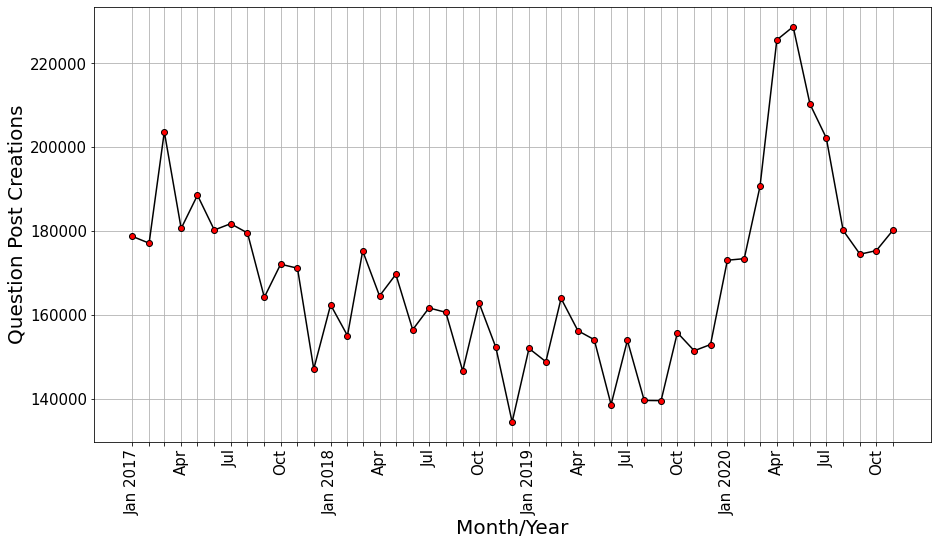

In [114]:
# yearly_monthly_ques.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ques['CreateYearMonth'],yearly_monthly_ques['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ques['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Question Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_QuestionsYearltMonthlyPlot.pdf',bbox_inches='tight')
# plt.ylabel('Question Post Creations')

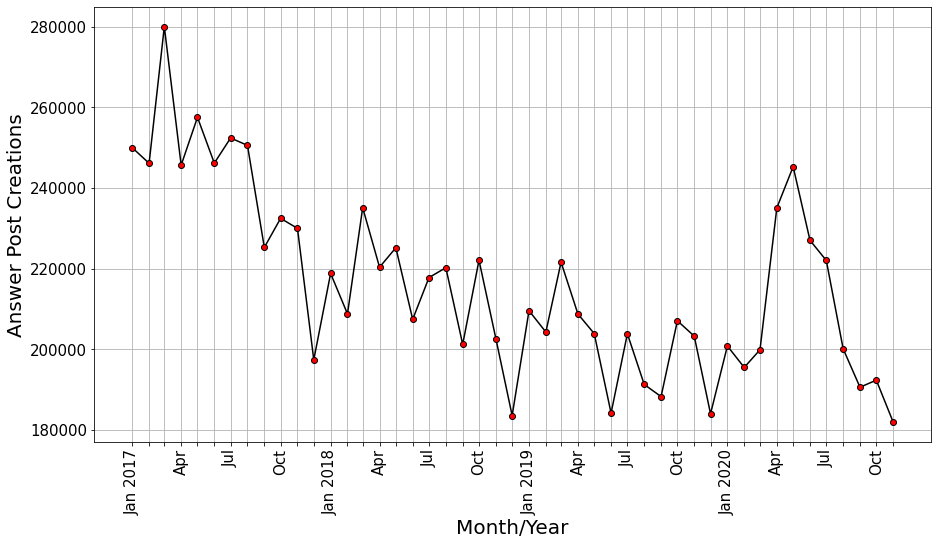

In [113]:
# yearly_monthly_ans.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Answer Post Creations')

fig, ax = plt.subplots(figsize=(15,8))
plt.plot(yearly_monthly_ans['CreateYearMonth'],yearly_monthly_ans['counts'],'-o',color='black',markerfacecolor='r')
plt.xticks(yearly_monthly_ans['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Answer Post Creations',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_AnswersYearltMonthlyPlot.pdf',bbox_inches='tight')

# Stats tests

Questions

In [406]:
yearly_monthly_ques_17=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2017-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2018-01-01')]
np.var(yearly_monthly_ques_17['counts'])

168247409.52083334

In [407]:
yearly_monthly_ques_18=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2018-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2019-01-01')]
np.var(yearly_monthly_ques_18['counts'])

105550558.80555557

In [408]:
yearly_monthly_ques_19=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2019-01-01') & (yearly_monthly_ques['CreateYearMonth']<'2020-01-01')]
np.var(yearly_monthly_ques_19['counts'])

54868078.74305556

In [409]:
yearly_monthly_ques_20=yearly_monthly_ques[(yearly_monthly_ques['CreateYearMonth']>='2020-01-01')]
np.var(yearly_monthly_ques_20['counts'])

408270260.2479338

In [410]:
kpss_test(yearly_monthly_ques_17['counts'])
kpss_test(yearly_monthly_ques_18['counts'])
kpss_test(yearly_monthly_ques_19['counts'])
kpss_test(yearly_monthly_ques_20['counts'])

KPSS Statistic: 0.37776492287786917
p-value: 0.0867392573802288
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.38122132562738037
p-value: 0.08524942860888778
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.3739590508187308
p-value: 0.088379719474685
num lags: 8
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.338015622637331
p-value: 0.1
num lags: 7
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1850: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\Farima\anaconda3\envs\StackOverFlowAnalysis\lib\site-packages\statsmodels\tsa\stattools.py:1885: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [411]:
adf_test(yearly_monthly_ques_17['counts'])
adf_test(yearly_monthly_ques_18['counts'])
adf_test(yearly_monthly_ques_19['counts'])
adf_test(yearly_monthly_ques_20['counts'])

Results of Dickey-Fuller Test:
Test Statistic                 2.610951
p-value                        0.999077
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -2.107673
p-value                        0.241440
#Lags Used                     4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                 -2.895425
p-value                         0.045883
#Lags Used                      0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64
Results of Dick

In [12]:
data_q.isnull().sum(axis = 0)

RowId                     0
CreateDate                0
Score                     0
ViewCount                 0
LastEditDate              0
LastActivityDate          0
AnswerCount               0
CommentCount              0
FavoritCount              0
AcceptedAnswerId    4549216
CreateYear                0
CreateMonth               0
CreateYearMonth           0
dtype: int64

In [13]:
data_a.isnull().sum(axis = 0)

RowId               0
CreateDate          0
Score               0
ViewCount           0
LastEditDate        0
LastActivityDate    0
AnswerCount         0
CommentCount        0
FavoritCount        0
ParentId            0
CreateYear          0
CreateMonth         0
CreateYearMonth     0
dtype: int64

In [116]:
ques_with_ans=data_q[data_q['AcceptedAnswerId'].notna()]

In [117]:
print(len(data_q))
print(len(ques_with_ans))
print(ques_with_ans.isnull().sum(axis = 0))

7945781
3396565
RowId               0
CreateDate          0
Score               0
ViewCount           0
LastEditDate        0
LastActivityDate    0
AnswerCount         0
CommentCount        0
FavoritCount        0
AcceptedAnswerId    0
CreateYear          0
CreateMonth         0
CreateYearMonth     0
IsWeekend           0
dtype: int64


In [118]:
ques_no_ans=data_q[data_q['AcceptedAnswerId'].isnull()]

In [119]:
print(len(ques_no_ans))
print(ques_no_ans.isnull().sum(axis = 0))

4549216
RowId                     0
CreateDate                0
Score                     0
ViewCount                 0
LastEditDate              0
LastActivityDate          0
AnswerCount               0
CommentCount              0
FavoritCount              0
AcceptedAnswerId    4549216
CreateYear                0
CreateMonth               0
CreateYearMonth           0
IsWeekend                 0
dtype: int64


# Number of questions not getting any answer over time

In [120]:
yearly_monthly_ques_no_ans=getYearlyMonthlyCreation(ques_no_ans)
print(yearly_monthly_ques_no_ans.head())

<ipython-input-7-87bdbe66d3f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateDate"] = pd.to_datetime(data["CreateDate"])
<ipython-input-7-87bdbe66d3f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["CreateYear"]=data['CreateDate'].map(lambda x: x.year)
<ipython-input-7-87bdbe66d3f3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

  CreateYearMonth  counts
0      2017-01-01   92450
1      2017-02-01   91825
2      2017-03-01  107441
3      2017-04-01   96096
4      2017-05-01  100411


In [121]:
print(len(yearly_monthly_ques_no_ans))
print(len(yearly_monthly_ques))

47
47


In [122]:
ques_ans_percent=pd.merge(yearly_monthly_ques_no_ans,yearly_monthly_ques,how='inner', 
                          on= 'CreateYearMonth')
ques_ans_percent.head()

,CreateYearMonth,counts_x,counts_y
0,2017-01-01,92450,178704
1,2017-02-01,91825,177073
2,2017-03-01,107441,203651
3,2017-04-01,96096,180589
4,2017-05-01,100411,188518


In [123]:
len(ques_ans_percent)

47

In [412]:
ques_ans_percent['PercentUnanswered']=ques_ans_percent['counts_x']/ques_ans_percent['counts_y']
ques_ans_percent['PercentUnanswered']=ques_ans_percent['PercentUnanswered']*100 #convert to percentage from fraction

In [413]:
print(len(ques_ans_percent))
print(ques_ans_percent.head())

47
  CreateYearMonth  counts_x  counts_y  PercentUnanswered
0      2017-01-01     92450    178704          51.733593
1      2017-02-01     91825    177073          51.857144
2      2017-03-01    107441    203651          52.757413
3      2017-04-01     96096    180589          53.212543
4      2017-05-01    100411    188518          53.263349


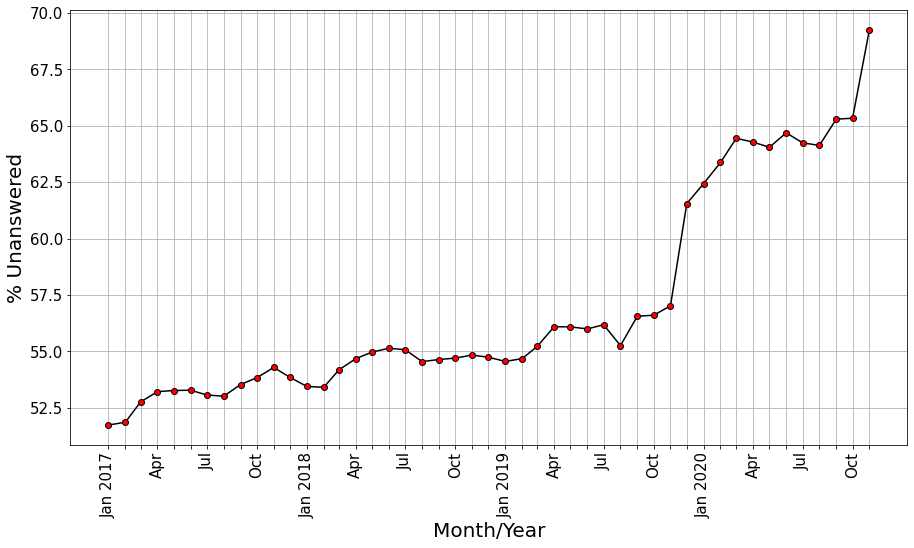

In [414]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_percent['CreateYearMonth'],ques_ans_percent['PercentUnanswered'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_percent['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('% Unanswered',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_NoAnswertMonthlyPlot.pdf',bbox_inches='tight')

# ques_ans_percent.plot(x='CreateYearMonth',y='PercentUnanswered',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('% Unanswered')

# Avg Response Time

In [317]:
ques_ans=pd.merge(ques_with_ans,data_a,how='inner', left_on= ['RowId'],right_on= ['ParentId'])

In [318]:
ques_ans.head()

,RowId_x,CreateDate_x,Score_x,ViewCount_x,LastEditDate_x,LastActivityDate_x,AnswerCount_x,CommentCount_x,FavoritCount_x,AcceptedAnswerId,...,ViewCount_y,LastEditDate_y,LastActivityDate_y,AnswerCount_y,CommentCount_y,FavoritCount_y,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,...,0,2017-01-01T01:11:04.750,2017-01-01T01:11:04.750,0,0,0,41412456,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,...,0,2017-01-01T00:51:06.773,2017-01-01T00:51:06.773,0,4,0,41412463,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,...,0,2017-01-01T01:03:25.117,2017-01-01T01:03:25.117,0,1,0,41412468,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,1,2416,2017-01-01T07:14:01.367,2017-01-01T07:14:01.367,3,4,0,41412570,...,0,2017-01-01T00:10:09.057,2017-01-01T00:10:09.057,0,7,0,41412475,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,1,2416,2017-01-01T07:14:01.367,2017-01-01T07:14:01.367,3,4,0,41412570,...,0,2017-01-01T00:32:54.857,2017-01-01T00:32:54.857,0,4,0,41412475,2017,1,2017-01-01


In [319]:
print(ques_ans.isnull().sum(axis = 0))

RowId_x               0
CreateDate_x          0
Score_x               0
ViewCount_x           0
LastEditDate_x        0
LastActivityDate_x    0
AnswerCount_x         0
CommentCount_x        0
FavoritCount_x        0
AcceptedAnswerId      0
CreateYear_x          0
CreateMonth_x         0
CreateYearMonth_x     0
IsWeekend             0
RowId_y               0
CreateDate_y          0
Score_y               0
ViewCount_y           0
LastEditDate_y        0
LastActivityDate_y    0
AnswerCount_y         0
CommentCount_y        0
FavoritCount_y        0
ParentId              0
CreateYear_y          0
CreateMonth_y         0
CreateYearMonth_y     0
dtype: int64


In [320]:
#drop the 770 rows that have null values for answers (possibly cause of data incompleteness)
# ques_ans.dropna()

In [321]:
ques_ans=ques_ans.drop(columns=["Score_x","ViewCount_x","LastEditDate_x","LastActivityDate_x","AnswerCount_x",
                                "CommentCount_x","FavoritCount_x"])
ques_ans.head()

# ques_ans.drop("ViewCount_y")
# ques_ans.drop("LastEditDate_y")
# ques_ans.drop("LastActivityDate_y")

,RowId_x,CreateDate_x,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,RowId_y,CreateDate_y,Score_y,ViewCount_y,LastEditDate_y,LastActivityDate_y,AnswerCount_y,CommentCount_y,FavoritCount_y,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,0,0,2017-01-01T01:11:04.750,2017-01-01T01:11:04.750,0,0,0,41412456,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,4,0,2017-01-01T00:51:06.773,2017-01-01T00:51:06.773,0,4,0,41412463,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,1,0,2017-01-01T01:03:25.117,2017-01-01T01:03:25.117,0,1,0,41412468,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,2,0,2017-01-01T00:10:09.057,2017-01-01T00:10:09.057,0,7,0,41412475,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,5,0,2017-01-01T00:32:54.857,2017-01-01T00:32:54.857,0,4,0,41412475,2017,1,2017-01-01


In [322]:
ques_ans=ques_ans.drop(columns=["Score_y","ViewCount_y","LastEditDate_y","LastActivityDate_y","AnswerCount_y",
                                "CommentCount_y","FavoritCount_y"])
ques_ans.head()

,RowId_x,CreateDate_x,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,RowId_y,CreateDate_y,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,41412456,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,41412463,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,41412468,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,41412475,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,41412475,2017,1,2017-01-01


In [323]:
ques_ans = ques_ans.rename(columns={'CreateDate_x': 'CreateDateQues', 'CreateDate_y': 'CreateDateAns',
                                    'RowId_x':'QuestionId','RowId_y':'AnswerId'})

In [324]:
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,AnswerId,CreateDateAns,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,41412456,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,41412463,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,41412468,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,41412475,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,41412475,2017,1,2017-01-01


In [325]:
ques_ans['CreateDateQues'] = pd.to_datetime(ques_ans['CreateDateQues'])
ques_ans['CreateDateAns'] = pd.to_datetime(ques_ans['CreateDateAns'])
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,AnswerId,CreateDateAns,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,41412456,2017,1,2017-01-01
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,41412463,2017,1,2017-01-01
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,41412468,2017,1,2017-01-01
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,41412475,2017,1,2017-01-01
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,41412475,2017,1,2017-01-01


In [326]:
ques_ans['ResponseTime']=(ques_ans['CreateDateAns']-ques_ans['CreateDateQues'])
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,AnswerId,CreateDateAns,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y,ResponseTime
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,41412456,2017,1,2017-01-01,0 days 01:10:25.040000
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,41412463,2017,1,2017-01-01,0 days 00:11:58.947000
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,41412468,2017,1,2017-01-01,0 days 00:42:30.480000
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,41412475,2017,1,2017-01-01,0 days 00:02:42.053000
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,41412475,2017,1,2017-01-01,0 days 00:27:47.107000


In [327]:
ques_ans['ResponseTimeSec']=ques_ans['ResponseTime'].dt.total_seconds()
ques_ans.head()

,QuestionId,CreateDateQues,AcceptedAnswerId,CreateYear_x,CreateMonth_x,CreateYearMonth_x,IsWeekend,AnswerId,CreateDateAns,ParentId,CreateYear_y,CreateMonth_y,CreateYearMonth_y,ResponseTime,ResponseTimeSec
0,41412456,2017-01-01 00:00:39.710,41412707,2017,1,2017-01-01,1,41412707,2017-01-01 01:11:04.750,41412456,2017,1,2017-01-01,0 days 01:10:25.040000,4225.040
1,41412463,2017-01-01 00:02:29.813,41412502,2017,1,2017-01-01,1,41412502,2017-01-01 00:14:28.760,41412463,2017,1,2017-01-01,0 days 00:11:58.947000,718.947
2,41412468,2017-01-01 00:03:39.970,41412618,2017,1,2017-01-01,1,41412618,2017-01-01 00:46:10.450,41412468,2017,1,2017-01-01,0 days 00:42:30.480000,2550.480
3,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412484,2017-01-01 00:07:49.803,41412475,2017,1,2017-01-01,0 days 00:02:42.053000,162.053
4,41412475,2017-01-01 00:05:07.750,41412570,2017,1,2017-01-01,1,41412570,2017-01-01 00:32:54.857,41412475,2017,1,2017-01-01,0 days 00:27:47.107000,1667.107


In [328]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

17
5198907


In [329]:
ques_ans=ques_ans[ques_ans['ResponseTimeSec']>=0]

In [330]:
print(len(ques_ans[ques_ans['ResponseTimeSec']<0]))
print(len(ques_ans))

0
5198890


In [331]:
ques_ans_grp=ques_ans.groupby(['QuestionId','CreateDateQues'])['ResponseTimeSec'].min().reset_index()
ques_ans_grp.head()

,QuestionId,CreateDateQues,ResponseTimeSec
0,41412456,2017-01-01 00:00:39.710,4225.040
1,41412463,2017-01-01 00:02:29.813,718.947
2,41412468,2017-01-01 00:03:39.970,2550.480
3,41412475,2017-01-01 00:05:07.750,162.053
4,41412480,2017-01-01 00:06:43.183,142005.630


In [332]:
print(len(ques_ans))
print(len(ques_ans_grp))

5198890
3395795


In [333]:
ques_ans_grp["CreateDateQues"] = pd.to_datetime(ques_ans_grp["CreateDateQues"])
#     print(data.head())
ques_ans_grp["CreateYear"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.year)
#     print(data.head())
ques_ans_grp["CreateMonth"]=ques_ans_grp['CreateDateQues'].map(lambda x: x.month)
#     print(data.head())
ques_ans_grp["CreateYearMonth"]=ques_ans_grp["CreateYear"].astype(str) +"-"+ ques_ans_grp["CreateMonth"].astype(str)
#     print(data.head())
ques_ans_grp['CreateYearMonth'] = pd.to_datetime(ques_ans_grp['CreateYearMonth'])
print(ques_ans_grp.head())

  QuestionId          CreateDateQues  ResponseTimeSec  CreateYear  \
0   41412456 2017-01-01 00:00:39.710         4225.040        2017   
1   41412463 2017-01-01 00:02:29.813          718.947        2017   
2   41412468 2017-01-01 00:03:39.970         2550.480        2017   
3   41412475 2017-01-01 00:05:07.750          162.053        2017   
4   41412480 2017-01-01 00:06:43.183       142005.630        2017   

   CreateMonth CreateYearMonth  
0            1      2017-01-01  
1            1      2017-01-01  
2            1      2017-01-01  
3            1      2017-01-01  
4            1      2017-01-01  


In [334]:
ques_ans_grp["ResponseTimeMin"]=ques_ans_grp['ResponseTimeSec']/60.0
ques_ans_grp["ResponseTimeHr"]=ques_ans_grp['ResponseTimeMin']/60.0
ques_ans_grp.head()

,QuestionId,CreateDateQues,ResponseTimeSec,CreateYear,CreateMonth,CreateYearMonth,ResponseTimeMin,ResponseTimeHr
0,41412456,2017-01-01 00:00:39.710,4225.040,2017,1,2017-01-01,70.417333,1.173622
1,41412463,2017-01-01 00:02:29.813,718.947,2017,1,2017-01-01,11.982450,0.199708
2,41412468,2017-01-01 00:03:39.970,2550.480,2017,1,2017-01-01,42.508000,0.708467
3,41412475,2017-01-01 00:05:07.750,162.053,2017,1,2017-01-01,2.700883,0.045015
4,41412480,2017-01-01 00:06:43.183,142005.630,2017,1,2017-01-01,2366.760500,39.446008


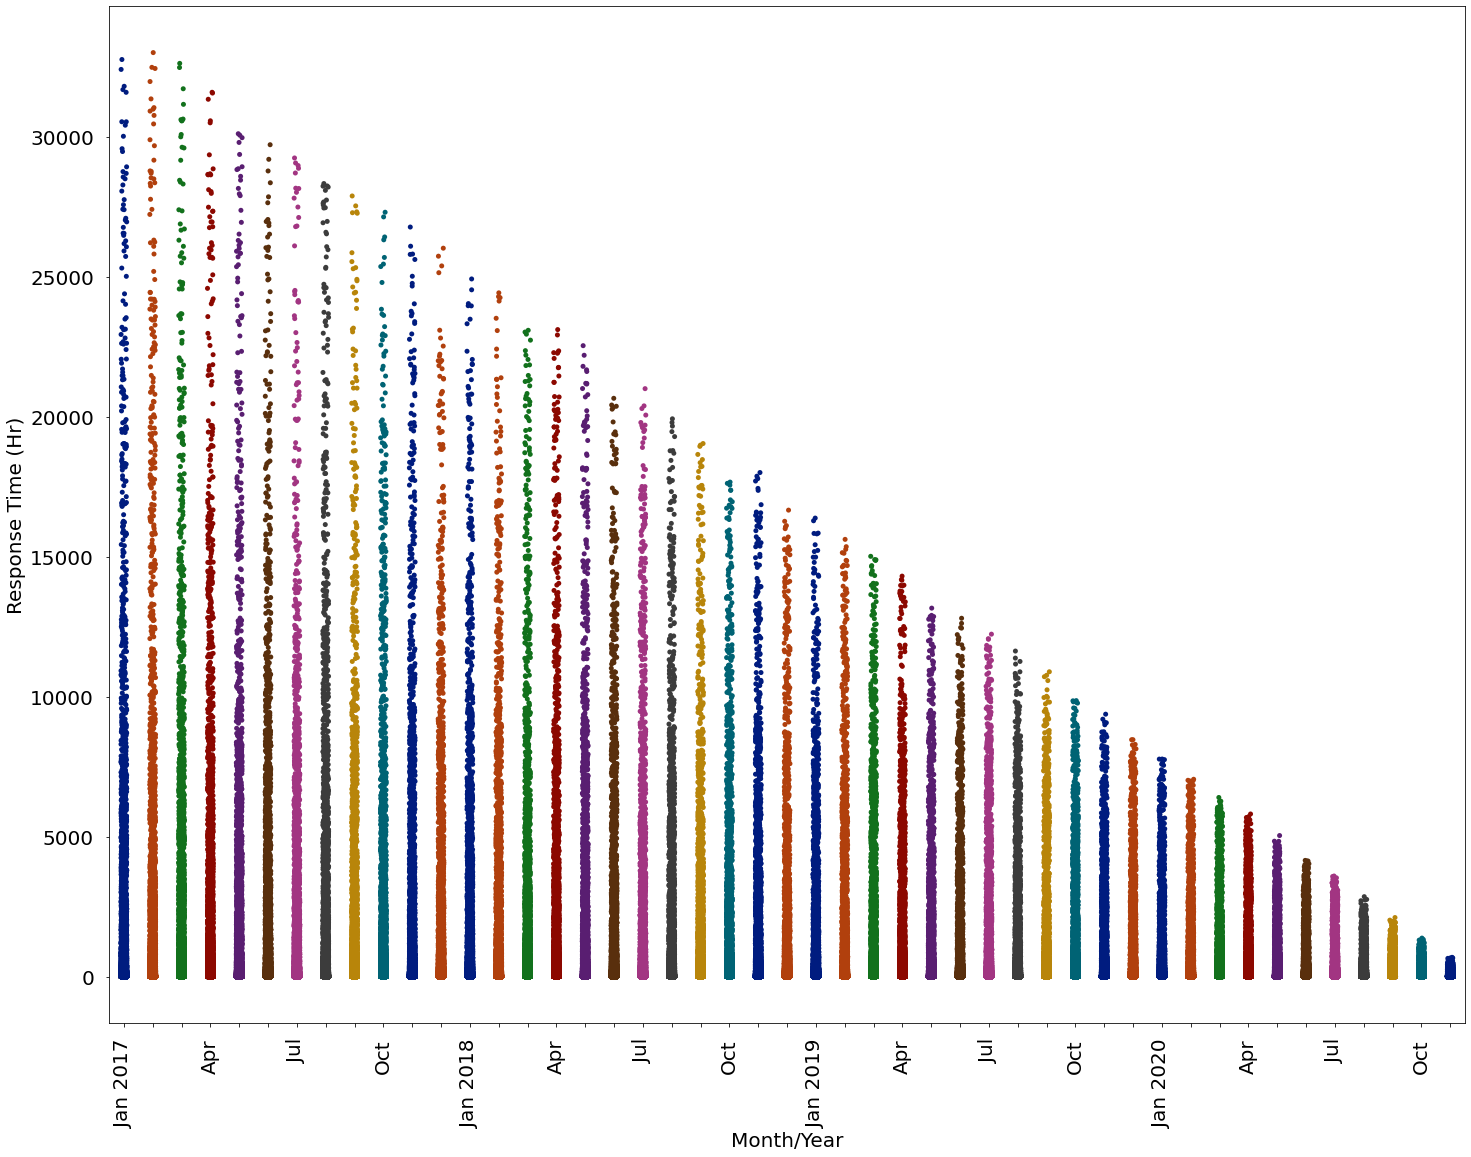

In [335]:
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 20, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp['CreateYearMonth'], y=ques_ans_grp['ResponseTimeHr'],palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=20)
# plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.show()
fig = myplot.get_figure()
# fig.savefig(...)
fig.savefig('figs/SO_ResponseTime.png',bbox_inches='tight')


In [336]:
ques_ans_grp_2019_2020=ques_ans_grp[(ques_ans_grp["CreateYear"]==2019) | (ques_ans_grp["CreateYear"]==2020) ]
len(ques_ans_grp_2019_2020)
ques_ans_grp_2020=ques_ans_grp[ques_ans_grp["CreateYear"]==2020]
len(ques_ans_grp_2020)

746237

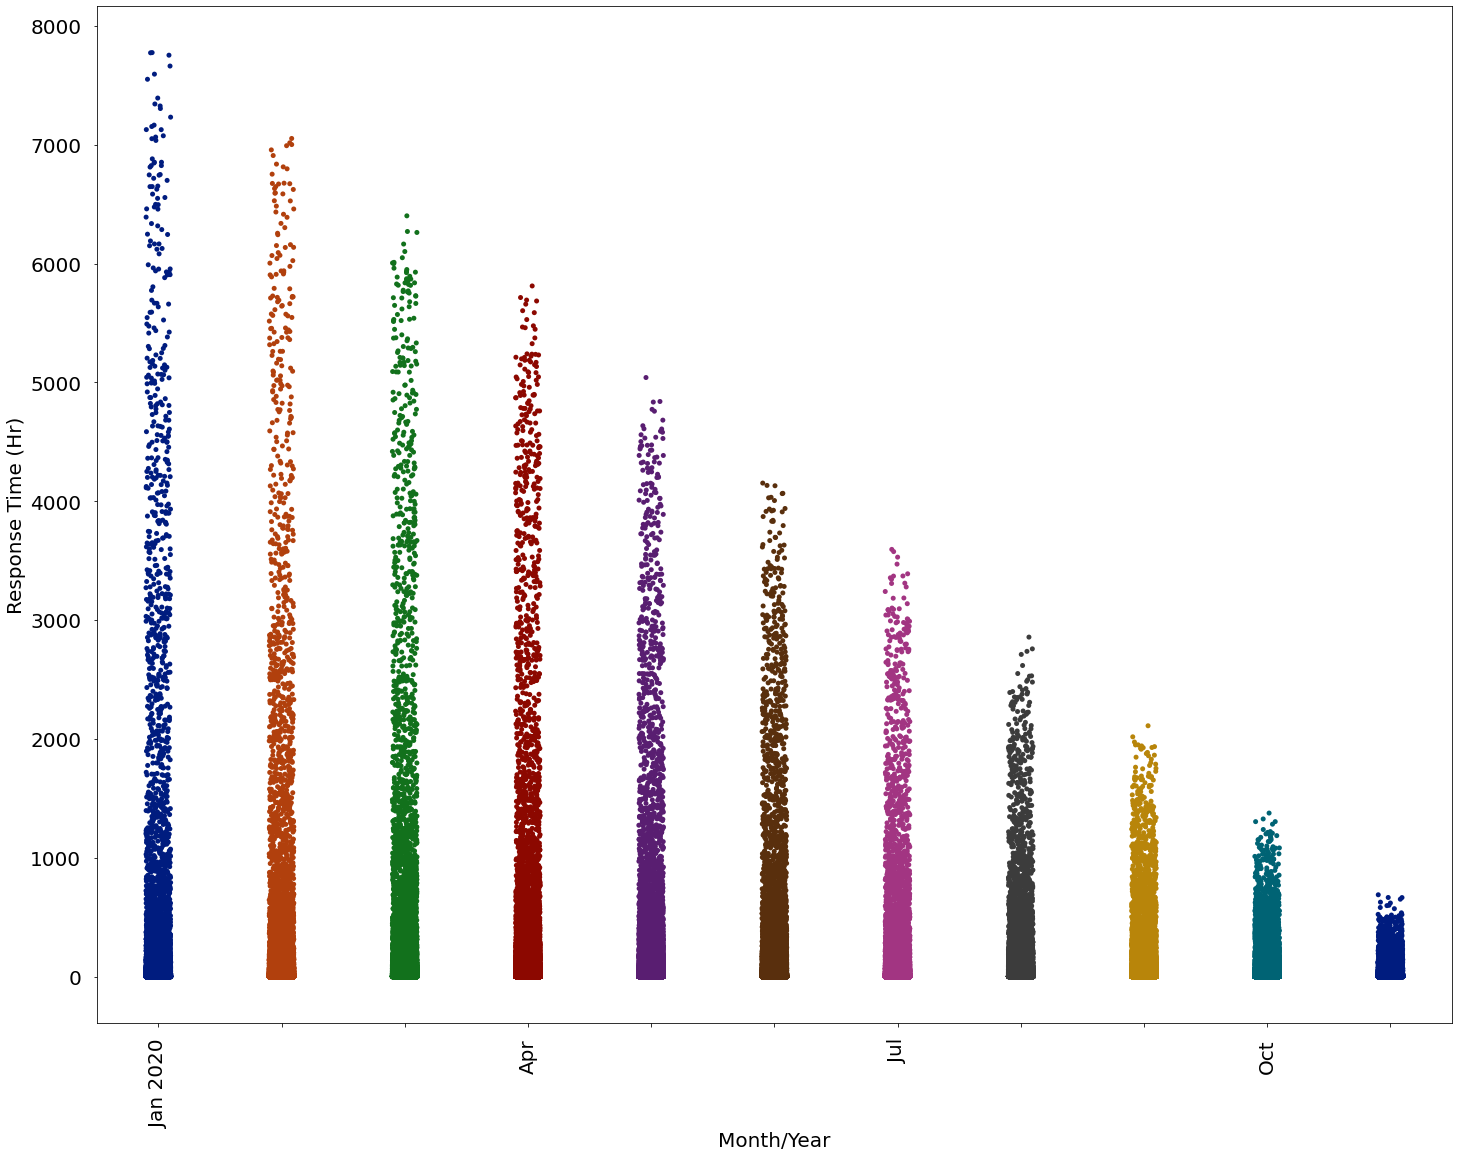

In [369]:
months_xticks_2020=['Jan 2020','','','Apr','','','Jul','','','Oct','']
fig, ax = plt.subplots(figsize=(20, 15))
ax.tick_params(axis ='both', which ='major',  
               labelsize = 20, pad = 12,  ) 
plt.tight_layout()
myplot=sb.stripplot(x=ques_ans_grp_2020['CreateYearMonth'], y=ques_ans_grp_2020['ResponseTimeHr'],
             palette=sb.color_palette("dark", n_colors=12))
ax.set_xticklabels(months_xticks_2020, minor=False)

# plt.xticks(fontsize=15,rotation=90)
# plt.yticks(fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.ylabel('Response Time (Hr)',fontsize=20)
# plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.show()
fig = myplot.get_figure()
fig.savefig('figs/SO_ResponseTime2020.png',bbox_inches='tight')

In [338]:
ques_ans_yearly_monthly = pd.DataFrame(ques_ans_grp[["QuestionId", "CreateYearMonth","ResponseTimeMin"]])
#     print(creation_yearly_monthly.head())
ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].mean().reset_index()
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_mean['ResponseTimeSec']=ques_ans_yearly_monthly_mean['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_mean=ques_ans_yearly_monthly_mean.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_mean['ResponseTimeMin']=ques_ans_yearly_monthly_mean['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_mean.head()

,CreateYearMonth,ResponseTimeMin
0,2017-01-01,7548
1,2017-02-01,7456
2,2017-03-01,7370
3,2017-04-01,7354
4,2017-05-01,7013


In [339]:
ques_ans_yearly_monthly_median=ques_ans_yearly_monthly.groupby(['CreateYearMonth'])['ResponseTimeMin'].median().reset_index()
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to min
# ques_ans_yearly_monthly_median['ResponseTimeSec']=ques_ans_yearly_monthly_median['ResponseTimeSec']/60 #to hr
# ques_ans_yearly_monthly_median=ques_ans_yearly_monthly_median.rename(columns={"ResponseTimeSec":"ResponseTimeMin"})
ques_ans_yearly_monthly_median['ResponseTimeMin']=ques_ans_yearly_monthly_median['ResponseTimeMin'].astype(int)
ques_ans_yearly_monthly_median.head()

,CreateYearMonth,ResponseTimeMin
0,2017-01-01,30
1,2017-02-01,29
2,2017-03-01,29
3,2017-04-01,30
4,2017-05-01,30


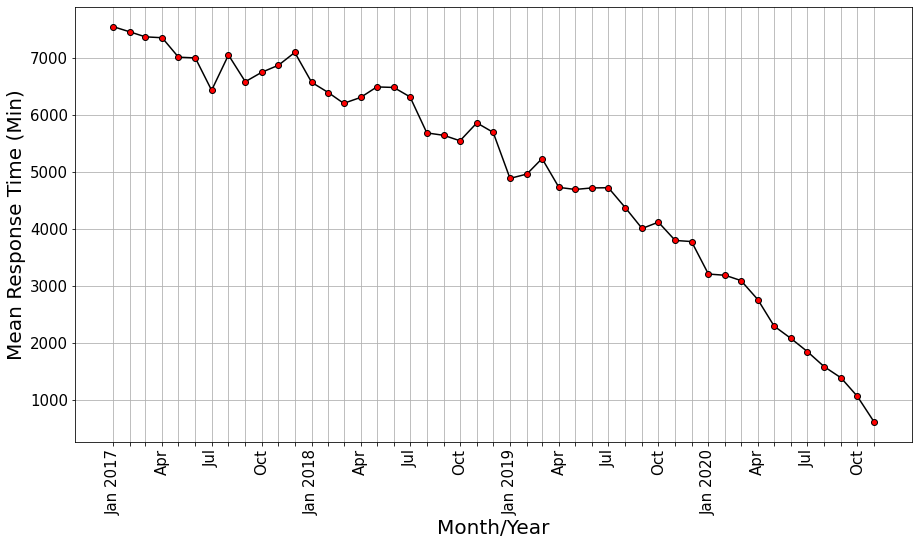

In [340]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_mean['CreateYearMonth'],ques_ans_yearly_monthly_mean['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_mean['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Mean Response Time (Min)',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_MeanResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_mean.plot(x='CreateYearMonth',y='ResponseTimeHr',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Mean Response Time (Hr)')

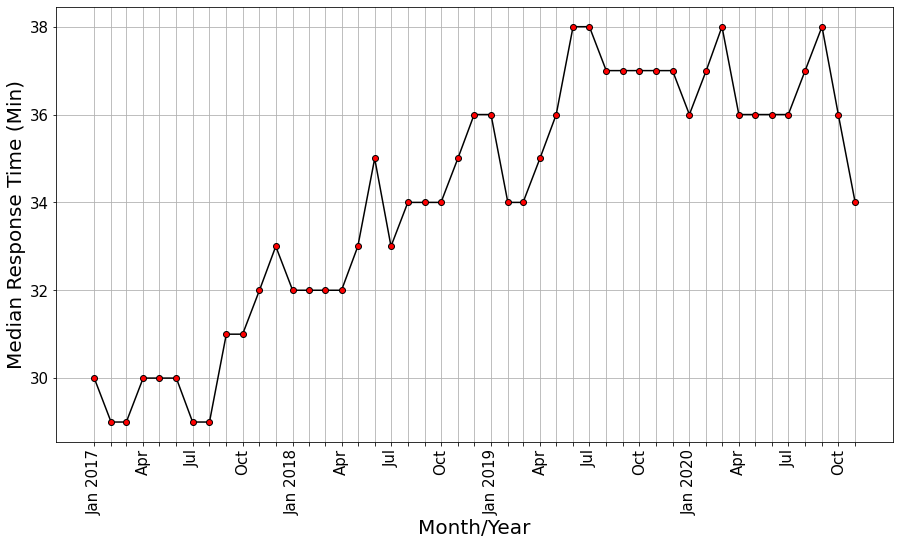

In [341]:
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(ques_ans_yearly_monthly_median['CreateYearMonth'],ques_ans_yearly_monthly_median['ResponseTimeMin'],'-o',color='black',markerfacecolor='r')
plt.xticks(ques_ans_yearly_monthly_median['CreateYearMonth'], months_xticks,fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('Median Response Time (Min)',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_MedianResponseTime.pdf',bbox_inches='tight')

# ques_ans_yearly_monthly_median.plot(x='CreateYearMonth',y='ResponseTimeMin',figsize=(15,6),linestyle='-',
#                          marker='.', markerfacecolor='r',color='black',markersize=10)
# # plt.rcParams.update({'font.size': 12})
# plt.grid()
# plt.xlabel('Month/Year')
# plt.ylabel('Median Response Time (Min)')

# Weekend vs Weekday

In [373]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017,1,2017-01-01,1


In [374]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,CreateYear,CreateMonth,CreateYearMonth
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017,1,2017-01-01
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017,1,2017-01-01
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017,1,2017-01-01
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017,1,2017-01-01
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017,1,2017-01-01


In [375]:
#Return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6
data_q["IsWeekend"]=np.where(((data_q["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek
data_a["IsWeekend"]=np.where(((data_a["CreateDate"]).dt.dayofweek) < 5,0,1) #pd.DatetimeIndex(data_q["CreateDate"]).dayofweek

In [376]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017,1,2017-01-01,1


In [377]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017,1,2017-01-01,1
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017,1,2017-01-01,1
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017,1,2017-01-01,1
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017,1,2017-01-01,1
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017,1,2017-01-01,1


In [378]:
data_q["CreateDate"] = pd.to_datetime(data_q["CreateDate"])
data_q["CreateYear"]=data_q['CreateDate'].map(lambda x: x.year)
data_q["CreateMonth"]=data_q['CreateDate'].map(lambda x: x.month)
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017,1,2017-01-01,1


In [379]:
data_a["CreateDate"] = pd.to_datetime(data_a["CreateDate"])
data_a["CreateYear"]=data_a['CreateDate'].map(lambda x: x.year)
data_a["CreateMonth"]=data_a['CreateDate'].map(lambda x: x.month)
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017,1,2017-01-01,1
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017,1,2017-01-01,1
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017,1,2017-01-01,1
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017,1,2017-01-01,1
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017,1,2017-01-01,1


In [382]:
data_q['CreateYearMonth'] = pd.to_datetime(data_q['CreateYearMonth'])
ques_creation_yearly_monthly_weekend = pd.DataFrame(data_q[["RowId", "CreateYearMonth","IsWeekend"]])
ques_creation_yearly_monthly_weekend.head()

,RowId,CreateYearMonth,IsWeekend
0,41412454,2017-01-01,1
1,41412456,2017-01-01,1
2,41412462,2017-01-01,1
3,41412463,2017-01-01,1
4,41412468,2017-01-01,1


In [383]:
data_a['CreateYearMonth'] = pd.to_datetime(data_a['CreateYearMonth'])
ans_creation_yearly_monthly_weekend = pd.DataFrame(data_a[["RowId", "CreateYearMonth","IsWeekend"]])
ans_creation_yearly_monthly_weekend.head()

,RowId,CreateYearMonth,IsWeekend
0,41412453,2017-01-01,1
1,41412455,2017-01-01,1
2,41412458,2017-01-01,1
3,41412459,2017-01-01,1
4,41412461,2017-01-01,1


In [384]:
ques_yearly_monthly_weekend_weekday_grp=ques_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ques_yearly_monthly_weekend_weekday_grp.head()


,CreateYearMonth,IsWeekend,counts
0,2017-01-01,0,147189
1,2017-01-01,1,31515
2,2017-02-01,0,145825
3,2017-02-01,1,31248
4,2017-03-01,0,171356


In [385]:
ans_yearly_monthly_weekend_weekday_grp=ans_creation_yearly_monthly_weekend.groupby(by=['CreateYearMonth','IsWeekend']).size().reset_index(name='counts')
ans_yearly_monthly_weekend_weekday_grp.head()


,CreateYearMonth,IsWeekend,counts
0,2017-01-01,0,206715
1,2017-01-01,1,43250
2,2017-02-01,0,203206
3,2017-02-01,1,42907
4,2017-03-01,0,236378


In [386]:
ques_yearly_monthly_weekend_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ques_yearly_monthly_weekend_grp.head()
len(ques_yearly_monthly_weekend_grp)

47

In [387]:
ans_yearly_monthly_weekend_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==1)]
ans_yearly_monthly_weekend_grp.head()
len(ans_yearly_monthly_weekend_grp)

47

In [388]:
ques_yearly_monthly_weekday_grp=ques_yearly_monthly_weekend_weekday_grp[(ques_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ques_yearly_monthly_weekday_grp.head()
len(ques_yearly_monthly_weekday_grp)

47

In [389]:
ans_yearly_monthly_weekday_grp=ans_yearly_monthly_weekend_weekday_grp[(ans_yearly_monthly_weekend_weekday_grp["IsWeekend"]==0)]
ans_yearly_monthly_weekday_grp.head()
len(ans_yearly_monthly_weekday_grp)

47

Text(0, 0.5, 'Questions asked in workdays')

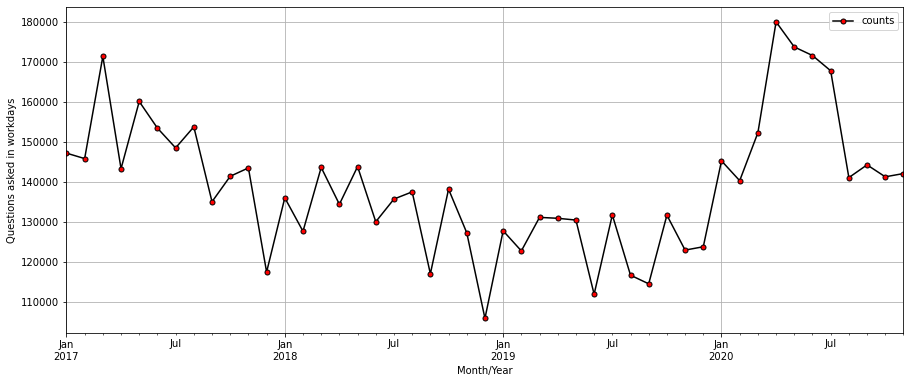

In [390]:
ques_yearly_monthly_weekday_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in workdays')

Text(0, 0.5, 'Questions asked in weekends')

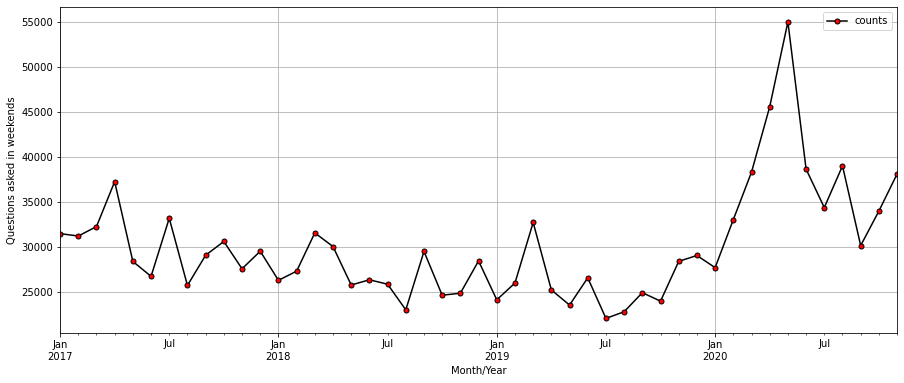

In [391]:
ques_yearly_monthly_weekend_grp.plot(x='CreateYearMonth',y='counts',figsize=(15,6),linestyle='-',
                         marker='.', markerfacecolor='r',color='black',markersize=10)
# plt.rcParams.update({'font.size': 12})
plt.grid()
plt.xlabel('Month/Year')
plt.ylabel('Questions asked in weekends')

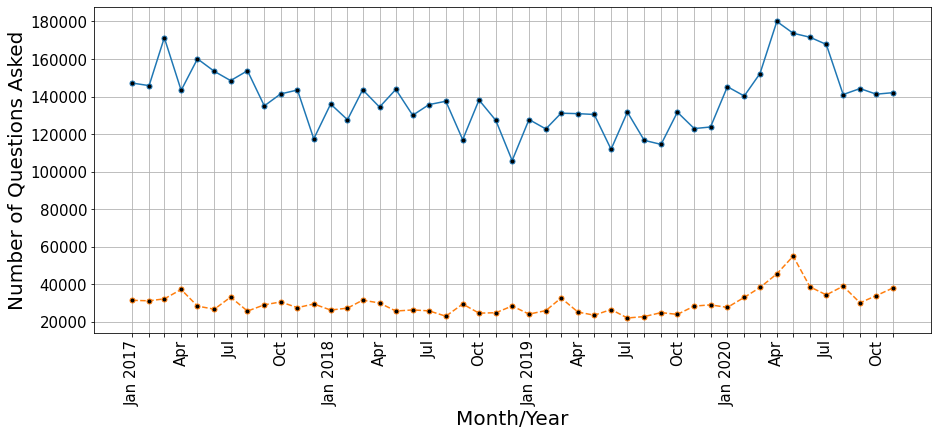

In [400]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ques_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black',markersize=10)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10)
#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.xticks(ques_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Questions Asked',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_QuestionsWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')


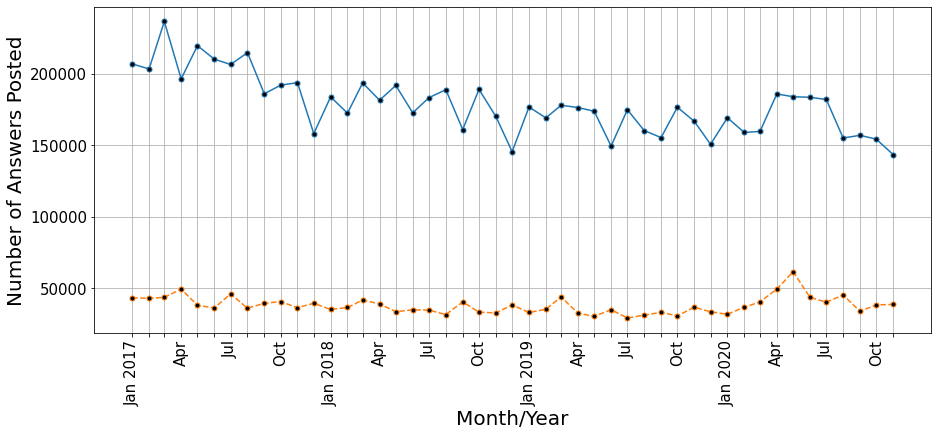

In [401]:
fig, ax = plt.subplots(figsize=(15,6))

for name, group in ans_yearly_monthly_weekend_weekday_grp.groupby('IsWeekend'):
    if(name==1):
        lbl="Weekend"
        plt.plot(group['CreateYearMonth'],group['counts'],linestyle='dashed',marker='.',markerfacecolor='black',markersize=10)
    else:
        lbl="Workday"
        plt.plot(group['CreateYearMonth'],group['counts'],marker='.',markerfacecolor='black',markersize=10)

#     group.plot(x='CreateYearMonth',y='counts', ax=ax, label=lbl)
plt.xticks(ans_yearly_monthly_weekend_grp['CreateYearMonth'], months_xticks,fontsize=15,rotation=90) #use ans_yearly_monthly_weekend_grp['CreateYearMonth'] since ans_yearly_monthly_weekend_weekday_grp has two values for each month (weekend and weekday)
plt.yticks(fontsize=15)
plt.ylabel('Number of Answers Posted',fontsize=20)
plt.grid()
plt.xlabel('Month/Year',fontsize=20)
plt.savefig('figs/SO_AnswersWeekendWeekdayYearlyMonthly.pdf',bbox_inches='tight')

In [355]:
data_q.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,AcceptedAnswerId,CreateYear,CreateMonth,CreateYearMonth,IsWeekend
0,41412454,2017-01-01 00:00:04.523,1,98,2017-01-01T08:59:29.900,2017-09-04T16:46:00.153,0,6,0,NaN,2017,1,2017-01-01,1
1,41412456,2017-01-01 00:00:39.710,-1,157,2017-01-01T00:08:20.607,2017-01-01T01:11:04.750,1,2,0,41412707,2017,1,2017-01-01,1
2,41412462,2017-01-01 00:02:06.737,4,617,2017-01-01T00:02:06.737,2017-03-10T11:13:04.783,1,0,0,NaN,2017,1,2017-01-01,1
3,41412463,2017-01-01 00:02:29.813,1,985,2017-01-01T00:18:43.323,2017-01-01T00:51:06.773,1,4,0,41412502,2017,1,2017-01-01,1
4,41412468,2017-01-01 00:03:39.970,0,114,2017-01-01T00:03:39.970,2017-01-01T01:03:25.117,1,2,0,41412618,2017,1,2017-01-01,1


In [356]:
len(data_q)

7945781

In [357]:
data_2017=data_q[data_q["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

2124351

In [358]:
data_2018=data_q[data_q["CreateYear"]==2018]
len(data_2018)

1901338

In [359]:
data_2019=data_q[data_q["CreateYear"]==2019]
len(data_2019)

1806283

In [360]:
data_2020=data_q[data_q["CreateYear"]==2020]
len(data_2020)

2113809

In [361]:
data_a.head()

,RowId,CreateDate,Score,ViewCount,LastEditDate,LastActivityDate,AnswerCount,CommentCount,FavoritCount,ParentId,CreateYear,CreateMonth,CreateYearMonth
0,41412453,2017-01-01 00:00:01.343,1,0,2017-01-03T13:51:57.170,2017-01-03T13:51:57.170,0,3,0,41412359,2017,1,2017-01-01
1,41412455,2017-01-01 00:00:12.243,2,0,2017-05-23T11:47:07.663,2017-01-01T00:00:12.243,0,4,0,41412413,2017,1,2017-01-01
2,41412458,2017-01-01 00:01:24.430,1,0,2020-06-20T09:12:55.060,2017-01-01T00:01:24.430,0,0,0,41412344,2017,1,2017-01-01
3,41412459,2017-01-01 00:01:41.543,1,0,2017-01-01T01:27:02.057,2017-01-01T01:27:02.057,0,0,0,40280895,2017,1,2017-01-01
4,41412461,2017-01-01 00:01:44.853,1,0,2017-01-01T00:01:44.853,2017-01-01T00:01:44.853,0,0,0,41412388,2017,1,2017-01-01


In [362]:
len(data_a)

10177940

In [363]:
data_2017=data_a[data_a["CreateYear"]==2017]
data_2017.head()
max(data_2017["CreateYear"])
len(data_2017)

2913396

In [364]:
data_2018=data_a[data_a["CreateYear"]==2018]
len(data_2018)

2563399

In [365]:
data_2019=data_a[data_a["CreateYear"]==2019]
len(data_2019)

2410316

In [366]:
data_2020=data_a[data_a["CreateYear"]==2020]
len(data_2020)

2290829